A qiskit notebook demonstrating the [quantum Zeno effect](https://en.wikipedia.org/wiki/Quantum_Zeno_effect)

A single qubit is initialized to 0, and then the following operations are performed 100 times:
* rotation by pi/100 degrees along the Y axis
* measurement

This results in the vast majority of final measurements measuring the qubit in the same state as it started. After each measurement the state of the qubit is "changed" to 1 with ~0.0001 probability, otherwise "moved back" to 0, losing superposition properties.

For comparison, a single qubit is later rotated by pi/100 degrees 100 times (without intermediate measurements), resulting in a single pi rotation, ending in the state 1 with 100% probability.

Finally, we see that the effect is amplified by more frequent measurements - reducing the probability of the state of the quantum system changing during the same total period of time.

In [1]:
import numpy as np

In [2]:
#Install Qiskit and aer
!pip install qiskit
!pip install qiskit-aer

  Obtaining dependency information for qiskit from https://files.pythonhosted.org/packages/2b/fd/fce71c2d409b63b9de59e1a840573ace3e182b4a63242bb4962dc67ac77b/qiskit-0.46.0-py3-none-any.whl.metadata
  Obtaining dependency information for qiskit-terra==0.46.0 from https://files.pythonhosted.org/packages/62/18/7e6bd149670f43e633e7a114b4a8ce64566d568953144e1215d278197066/qiskit_terra-0.46.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for rustworkx>=0.13.0 from https://files.pythonhosted.org/packages/16/05/bcbfcb9c87c9b2c33fcb2d715f4f8de21ea1b870b148f98ba5c2c1cfc79f/rustworkx-0.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.3 MB/s eta 0:00:00
  Obtaining dependency information for stevedore>=3.0.0 from https://files.pythonhosted.org/packages/4b/68/e739fd061b0aba464bef8e8be48428b2aabbfb3f2f8f2f8ca257363ee6b2/stevedore-5.1.0-py3-none-any.whl.metadata


In [3]:
#Imports
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [4]:
# Construct quantum circuit with many measurements
# We repeat 1/100th of an 180 degree rotation followed by a measurement 100 times
# Each measurement collapses the qubit back from a superposition to a basis state resulting in the Quantum Zeno effect
circ = QuantumCircuit(1,1)
for x in range(100):
    circ.ry(np.pi/100, 0)
    circ.measure(0,0)

In [5]:
#Draw the circuit
circ.draw()

┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐┌───────────┐┌─┐»
«  q: ┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├┤ Ry(π/100) ├┤M├»
«     └───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘└───────────┘└╥┘»
«c: 1/══════════════╩═══════════════╩═══════════════╩═══════════════╩═»
«                   0               0               0               0 »
«     ┌───────────┐┌─┐┌───────────┐┌─┐┌───────────

/tmp/ipykernel_18/2321251475.py:4: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')
/tmp/ipykernel_18/2321251475.py:7: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circ, simulator, shots=1000).result()


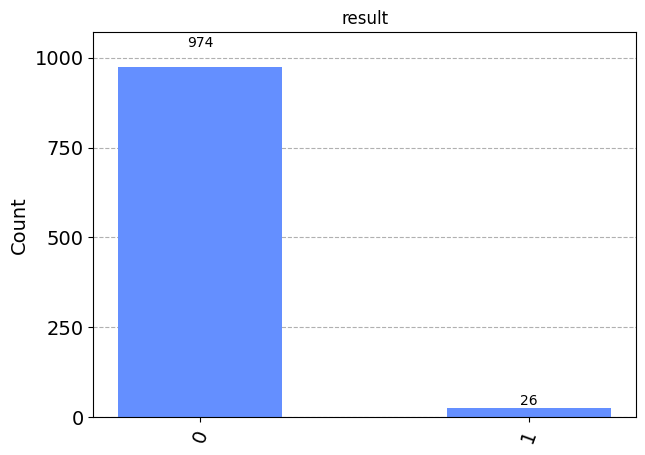

In [6]:
# Select the QasmSimulator from the Aer provider
# If we wanted to use IBM Cloud we'd need to set up a service with our own token here
# https://docs.quantum.ibm.com/start/setup-channel
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circ, simulator, shots=1000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='result')

In [7]:
# Construct quantum circuit with one measurement at the end, but the same number of the same rotations
circ = QuantumCircuit(1,1)
for x in range(100):
    circ.ry(np.pi/100, 0)
circ.measure(0,0)

In [8]:
#Draw the circuit
circ.draw()

┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
c: 1/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐»
«  q: ┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├┤ Ry(π/100) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 1/═════════════════════════════════════════════════════════════════»
«                                                                   

/tmp/ipykernel_18/1967309615.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circ, simulator, shots=1000).result()


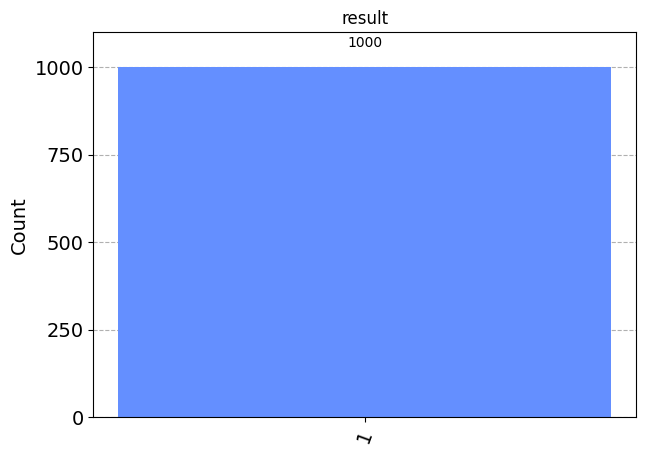

In [9]:
#Measure
result = execute(circ, simulator, shots=1000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='result')

We can magnify the effect by simulating more frequent observations (more but proportionally smaller rotations)

/tmp/ipykernel_18/738742719.py:6: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circ, simulator, shots=1000).result()


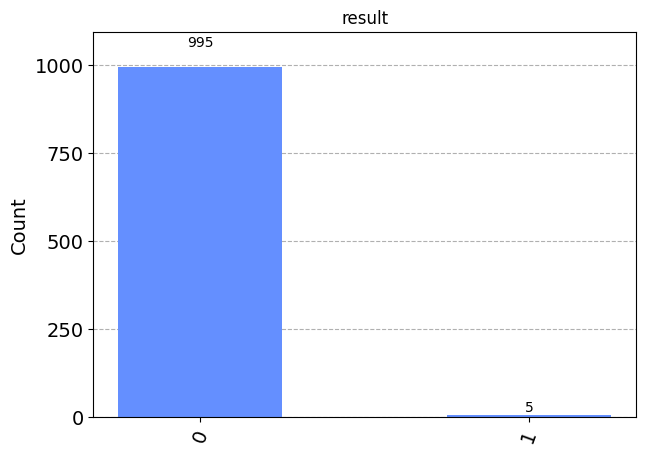

In [10]:
# Pi/1000 rotations
circ = QuantumCircuit(1,1)
for x in range(1000):
    circ.ry(np.pi/1000, 0)
    circ.measure(0,0)
result = execute(circ, simulator, shots=1000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='result')

With 100 measurements we had roughly 2% rate of measurements resulting with 1 at the end

With 1000 measurements we had 2 out of 1000 --> ~0.2%